In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

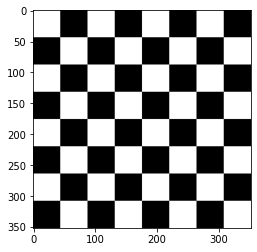

In [51]:
# Using Harris Corner Detection
flat = cv2.imread('DATA/flat_chessboard.png')
flat = cv2.cvtColor(flat, cv2.COLOR_BGR2RGB)
flat_gray = cv2.cvtColor(flat, cv2.COLOR_BGR2GRAY)
plt.imshow(flat_gray,cmap="gray")
gray = np.float32(flat_gray)

In [52]:
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

In [53]:
# This dilate is just for visualization purposes
dst = cv2.dilate(dst,None)

In [54]:
flat[dst>0.01*dst.max()] = [255,0,0]

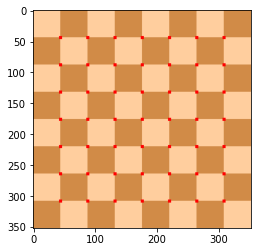

In [55]:
plt.imshow(flat)

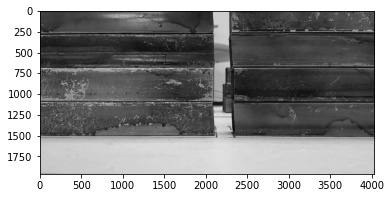

In [56]:
# Comparing algorithm with stack image
stack = cv2.imread('PhotosLARC/oneHalfHorizontal.png')
stack = cv2.cvtColor(stack, cv2.COLOR_BGR2RGB)
stack_gray = cv2.cvtColor(stack, cv2.COLOR_BGR2GRAY)
plt.imshow(stack_gray,cmap="gray")
gray = np.float32(stack_gray)

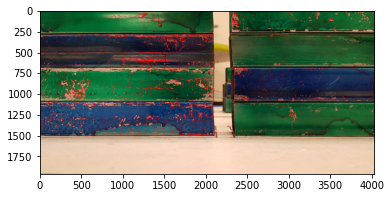

In [57]:
dst = cv2.cornerHarris(src=stack_gray,blockSize=2,ksize=3,k=0.04)
dst = cv2.dilate(dst,None)
stack[dst>0.01*dst.max()] = [255,0,0]
plt.imshow(stack)

In [74]:
# Now with Shi-tomasi detection
flat = cv2.imread('PhotosLARC/flat_chessboard.png')
flat = cv2.cvtColor(flat, cv2.COLOR_BGR2RGB)
flat_gray = cv2.cvtColor(flat, cv2.COLOR_BGR2GRAY)

In [75]:
corners = cv2.goodFeaturesToTrack(flat_gray,64,0.01,10)

In [76]:
corners = np.int0(corners)

In [77]:
for i in corners:
#     Flatten array
    x,y = i.ravel()
    cv2.circle(flat,(x,y),3,(255,0,0),-1)

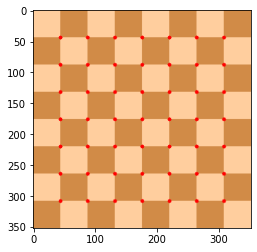

In [78]:
plt.imshow(flat)

In [92]:
# Now using stack image
stack = cv2.imread('../PhotosLARC/oneHalfHorizontal.png')
stack = cv2.cvtColor(stack, cv2.COLOR_BGR2RGB)
stack_gray = cv2.cvtColor(stack, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(stack_gray,80,0.01,10)
corners = np.int0(corners)

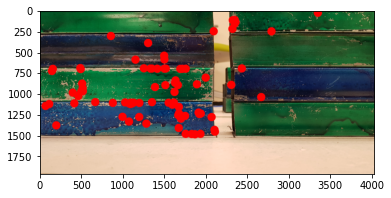

In [93]:
for i in corners:
#     Flatten array
    x,y = i.ravel()
    cv2.circle(stack,(x,y),50,(255,0,0),-1)
    
plt.imshow(stack)